**Multiple Linear Regresi**

In [ ]:
from google.colab import drive
drive.mount('/content/gdive')

Mounted at /content/gdive


Membaca data file CSV

In [ ]:
import pandas as pd
df = pd.read_csv('/content/gdive/MyDrive/Machine Learning Sem3/Tugas7/Data/dataset_satelit.csv', sep=',')
df.head()

,No,Longitude,Lattitude,N,P,K,Ca,Mg,Fe,Mn,...,b1,Sigma_VV,Sigma_VH,plia,lia,iafe,gamma0_vv,gamma0_vh,beta0_vv,beta0_vh
0,1,103.036658,-0.604417,2.64,0.15,0.415,0.51,0.31,119.96,463.23,...,0.0433,0.18183,0.04461,35.74446,35.79744,35.41161,0.22331,0.05479,0.31325,0.07686
1,2,103.037201,-0.604689,2.75,0.17,0.568,0.76,0.58,102.63,493.81,...,0.0465,0.22079,0.04640,35.12096,35.14591,35.41510,0.27116,0.05699,0.38033,0.07993
2,3,103.036359,-0.603012,1.77,0.12,0.339,0.49,0.6,107.37,460.93,...,0.0417,0.18926,0.03992,35.07724,35.07730,35.41135,0.23242,0.04902,0.32604,0.06876
3,4,103.036950,-0.603219,2.30,0.15,0.460,0.74,0.67,96.02,338.17,...,0.0367,0.14769,0.03622,36.08078,36.08469,35.41583,0.18138,0.04448,0.25440,0.06238
4,5,103.036802,-0.601969,2.05,0.14,0.308,0.64,0.72,87.01,384.33,...,0.0361,0.18205,0.03797,32.68855,32.69293,35.41592,0.22359,0.04664,0.31359,0.06541


Menghitung statistik deskriptif pada kolom numeric dengan describe

In [ ]:
df.describe()

,No,Longitude,Lattitude,N,P,K,Ca,Fe,Mn,Cu,...,b1,Sigma_VV,Sigma_VH,plia,lia,iafe,gamma0_vv,gamma0_vh,beta0_vv,beta0_vh
count,594.000000,594.000000,594.000000,594.000000,594.000000,593.000000,594.000000,594.000000,594.000000,594.000000,...,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000
mean,297.500000,106.878644,-1.024933,2.259091,0.141380,0.582175,0.595094,74.613771,308.034697,2.391195,...,0.177291,0.234474,0.102789,28.640422,28.664891,28.609569,0.202587,0.051524,0.269642,0.062320
std,171.617307,4.949840,0.965349,0.395499,0.019782,0.222567,0.366118,55.579655,241.731643,1.580296,...,0.155615,0.070516,0.112310,15.325347,15.380384,15.329170,0.104357,0.012959,0.143728,0.024218
min,1.000000,102.760857,-2.333750,1.140000,0.090000,0.122000,0.050000,21.080000,3.160000,0.090000,...,0.014100,0.115170,0.021460,0.127000,0.098600,0.026000,0.008700,0.016900,0.009300,0.016300
25%,149.250000,102.927811,-2.233338,1.982500,0.130000,0.429000,0.320000,40.705000,124.015000,1.172500,...,0.046925,0.183210,0.039535,31.959745,31.968948,33.685353,0.183085,0.040250,0.244935,0.052772
50%,297.500000,103.581969,-0.602276,2.280000,0.140000,0.549000,0.540000,65.650000,239.445000,2.225000,...,0.072700,0.213385,0.046550,35.067930,35.110415,34.611565,0.233590,0.050415,0.310380,0.068380
75%,445.750000,113.403797,-0.257349,2.570000,0.150000,0.710000,0.790000,87.372500,434.990000,3.357500,...,0.318900,0.262242,0.059190,38.319135,38.441065,39.002760,0.271790,0.060410,0.364505,0.079020
max,594.000000,113.434700,0.069251,3.230000,0.220000,1.489000,2.820000,559.100000,2009.320000,8.170000,...,0.751400,0.512210,0.373000,47.592900,48.014640,39.209330,0.658960,0.122300,0.814170,0.150620


Data Pre-processing

In [ ]:
df1 = (df[["N", "P", "K", "Ca", "Fe"]]
       .rename(columns={"N":"Nitrogen", "P":"Phosphor",
                        "K":"Kalium", "Ca":"Kalsium", "Fe":"Besi"})
       .round({
           "Nitrogen":2, "Phosphor":2, "Kalium":2,
           "Kalsium":2, "Besi":2})
       .dropna()
       .copy())
df1.head()

,Nitrogen,Phosphor,Kalium,Kalsium,Besi
0,2.64,0.15,0.42,0.51,119.96
1,2.75,0.17,0.57,0.76,102.63
2,1.77,0.12,0.34,0.49,107.37
3,2.30,0.15,0.46,0.74,96.02
4,2.05,0.14,0.31,0.64,87.01


Analisis Korelasi

In [ ]:
corr_matrix = df1.corr()
print(corr_matrix)

          Nitrogen  Phosphor    Kalium   Kalsium      Besi
Nitrogen  1.000000  0.643028 -0.139139  0.036623  0.337632
Phosphor  0.643028  1.000000  0.114807  0.117139  0.211267
Kalium   -0.139139  0.114807  1.000000 -0.087620 -0.193039
Kalsium   0.036623  0.117139 -0.087620  1.000000 -0.026452
Besi      0.337632  0.211267 -0.193039 -0.026452  1.000000


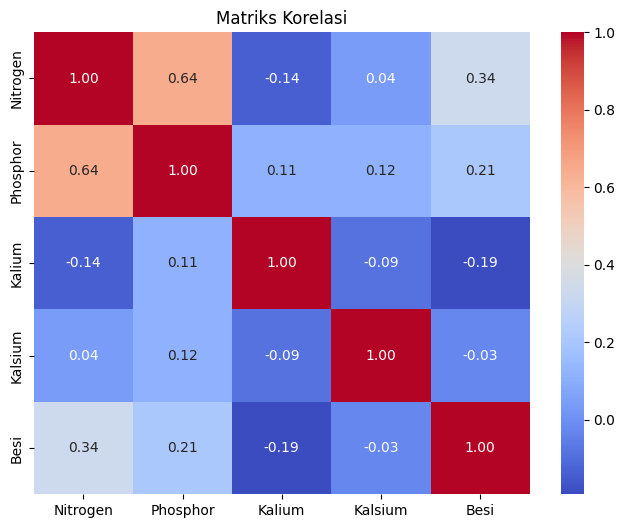

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi")

plt.show()

Membagi dataset untuk Training dan Test

In [ ]:
from sklearn.model_selection import train_test_split

y=df1["Nitrogen"]
X=df1[["Phosphor", "Besi"]]

X_train, X_test, y_train, y_test=train_test_split(
    X, y, test_size=0.2, random_state=42)

print("Jumlah data train:", len(X_train))
print("Jumlah data test", len(X_test))

X_train.head()

Jumlah data train: 474
Jumlah data test 119


,Phosphor,Besi
246,0.15,95.38
272,0.13,26.50
109,0.16,58.84
484,0.17,54.01
311,0.12,32.33


Pemodelan

In [ ]:
import statsmodels.api as sm

X_train_const = sm.add_constant(X_train)
X_train_const.head()

,const,Phosphor,Besi
246,1.0,0.15,95.38
272,1.0,0.13,26.50
109,1.0,0.16,58.84
484,1.0,0.17,54.01
311,1.0,0.12,32.33


In [ ]:
model = sm.OLS(y_train, X_train_const).fit()

print('--------------------')

print(model.params)

print('--------------------')

const = model.params['const']
x1_Phosphor = model.params['Phosphor']
x2_Besi = model.params['Besi']

print(f"y = {const:.3f} + {x1_Phosphor:.3f}*x1 + {x2_Besi:.3f}*x2")

--------------------
const        0.456801
Phosphor    11.887143
Besi         0.001562
dtype: float64
--------------------
y = 0.457 + 11.887*x1 + 0.002*x2


Evaluasi Model

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Nitrogen   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     192.7
Date:                Sun, 09 Nov 2025   Prob (F-statistic):           7.19e-62
Time:                        04:03:51   Log-Likelihood:                -95.276
No. Observations:                 474   AIC:                             196.6
Df Residuals:                     471   BIC:                             209.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4568      0.099      4.624      0.0

Pengujian model dengan data testing

In [ ]:
import numpy as np
X_test_const = sm.add_constant(X_test)
y_pred_test = model.predict(X_test_const)

hasil = pd.DataFrame({
    "Phosphor": X_test["Phosphor"].to_numpy(),
    "Besi": X_test["Besi"].to_numpy(),
    "Nitrogen": y_test.to_numpy(),
    "Prediksi": y_pred_test
})

hasil["Selisih error"] = hasil["Prediksi"] - hasil["Nitrogen"]
dennom = hasil["Nitrogen"].replace(0, np.nan)
hasil ["Akurasi (%)"] = (1 - (hasil ["Selisih error"].abs() / dennom)).clip(lower=0, upper=1)*100

hasil

,Phosphor,Besi,Nitrogen,Prediksi,Selisih error,Akurasi (%)
30,0.20,115.31,2.69,3.014334,0.324334,87.942967
76,0.13,104.06,2.23,2.164663,-0.065337,97.070073
228,0.14,88.02,2.36,2.258481,-0.101519,95.698345
425,0.11,37.94,1.82,1.823646,0.003646,99.799676
184,0.17,122.87,2.49,2.669528,0.179528,92.790040
...,...,...,...,...,...,...
158,0.14,143.62,2.15,2.345323,0.195323,90.915188
153,0.13,185.13,2.15,2.291287,0.141287,93.428504
523,0.16,79.34,2.96,2.482666,-0.477334,83.873864
396,0.11,36.15,1.92,1.820850,-0.099150,94.835941


**Interpretasi**

Analisis dimulai dengan mengimpor dataset yang berisi data satelit dengan 34 variabel. Dataset dibaca menggunakan pandas dan ditampilkan statistik deskriptifnya untuk memahami karakteristik data. Tahap pre-processing meliputi pemilihan variabel relevan (Nitrogen, Phosphor, Kalium, Kalsium, Besi) dengan rename kolom agar lebih mudah di pahami, pembulatan nilai, dan penghapusan data missing.

Analisis korelasi menggunakan heatmap menunjukkan hubungan terkuat antara Nitrogen-Phosphor (0.64) dan Nitrogen-Besi (0.34), sementara hubungan lainnya lemah atau negatif. Dataset kemudian dibagi menjadi data training (80%) dan testing (20%) dengan random state 42 untuk konsistensi.

Pemodelan menggunakan Ordinary Least Squares (OLS) dari statsmodels dengan menambahkan konstanta. Hasil model regresi linear multipel menunjukkan persamaan: y = 0.457 + 11.887*Phosphor + 0.002*Besi. Evaluasi model menunjukkan R-squared 0.450, meaning 45% variasi Nitrogen dapat dijelaskan oleh variabel Phosphor dan Besi. Koefisien regresi kedua variabel predictor signifikan (p-value < 0.05).

Pengujian model pada data testing menghasilkan akurasi yang bervariasi antara 83.87% hingga 99.80%, dengan rata-rata akurasi cukup baik.


**Kesimpulan:**

Berdasarkan analisis yang dilakukan, dapat disimpulkan bahwa model regresi linear multipel berhasil memprediksi kadar Nitrogen dengan cukup baik menggunakan variabel Phosphor dan Besi sebagai predictor. Meskipun R-squared hanya 45%, model ini masih memiliki nilai praktis karena kedua variabel predictor menunjukkan pengaruh yang signifikan secara statistik. Phosphor memiliki pengaruh yang lebih kuat terhadap Nitrogen dibandingkan Besi, terlihat dari koefisien regresi yang jauh lebih besar.

Hasil prediksi pada data testing menunjukkan performa yang memadai dengan akurasi rata-rata di atas 90%, meskipun terdapat beberapa outlier dengan akurasi lebih rendah. Model ini dapat digunakan sebagai alat prediksi awal untuk estimasi kadar Nitrogen, namun perlu penyempurnaan lebih lanjut dengan menambahkan variabel predictor lain yang mungkin memiliki hubungan lebih kuat dengan Nitrogen, atau menggunakan teknik pemodelan yang lebih advanced untuk meningkatkan akurasi prediksi.

**Link Github:** https://github.com/AdeliaJuliani/ML-Praktikum1